In [29]:
from functools import reduce
from PIL import Image

class Grid:
    width = 101
    height = 103
    mid_height = (height // 2)
    mid_width = (width // 2)


class Robot:
    def __init__(self, position: tuple[int, int], heading: tuple[int, int]):
        self.position = position
        self.heading = heading

    def __repr__(self):
        return f'Robot(p={self.position}, v={self.heading})'


def load_input() -> list[Robot]:
    with open("../../data/day14-input.txt") as f:
        robots: list[Robot] = []
        for line in f.readlines():
            parts = line.split(' ')
            position = tuple([int(_) for _ in parts[0].replace('p=', '').split(',')])
            directions = tuple([int(_) for _ in parts[1].replace('v=', '').split(',')])
            robot = Robot(position, directions)
            robots.append(robot)
    return robots

In [8]:
def run(iterations: int):
    robots = load_input()
    for robot in robots:
        for i in range(0, iterations):
            robot.position = (robot.position[0] + robot.heading[0], robot.position[1] + robot.heading[1])
            x, y = robot.position
            robot.position = (x % Grid.width, y % Grid.height)

        #x, y = robot.position
        #robot.position = (x % Grid.width, y % Grid.height)

    quadrants = [0, 0, 0, 0]

    for robot in robots:
        if robot.position[0] != Grid.mid_width and robot.position[1] != Grid.mid_height:
            if robot.position[0] < Grid.mid_width and robot.position[1] < Grid.mid_height:
                quadrants[0] += 1
            elif robot.position[0] < Grid.mid_width and robot.position[1] > Grid.mid_height:
                quadrants[1] += 1
            elif robot.position[0] > Grid.mid_width and robot.position[1] < Grid.mid_height:
                quadrants[2] += 1
            else:
                quadrants[3] += 1
    return quadrants, robots


quads, robots = run(100)
print(reduce(lambda x, y: x * y, quads))

225943500


### Part 2
This part is weird. You have to figure out when the first time *most* of the robots line up into a "Christmas tree."
I guess that means a pyramid shape near the top of the grid...


#### Notes
* I am writing code that spits out images of the grid. I created 10,000 images for each of the first 10,000 iterations.
  It took about 2 minutes and 8 seconds to complete. The directory size was about 323 MB with each PNG image being about 20-30 KB.
* I see a pattern where the robots arrange themselves in row and column forms.
* The first column shape happens on iteration i = 13, which is the 14th iteration because i is 0-indexed. Column patterns repeat every 101 cycles.
* The first row shape happens on iteration i = 93, and they repeat every 103 cycles.

So, it appears that column patterns repeat with multiples of the grid width +13, and row patterns repeat every multiple of grid height + 93.

I am going to print out a lot of those images and see what happens...


In [27]:
def visualize(robots: list[Robot]):
    table = {robot.position for robot in robots}

    img = Image.new('RGB', (Grid.width, Grid.height), 'black')
    pixels = img.load()

    grid = ''
    for i in range(Grid.width):
        for j in range(Grid.height):
            if (i, j) in table:
                grid += 'X'
                pixels[i, j] = (255, 255, 255)
            else:
                grid += '.'
        grid += '\n'
    #print(grid)
    return img.resize((img.width * 5, img.height *5))


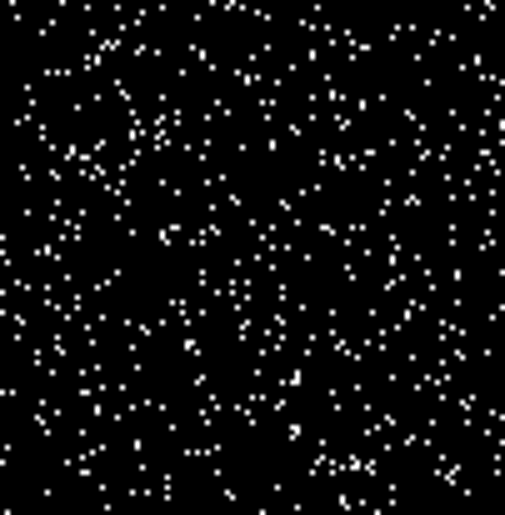

In [28]:
visualize(robots)

In [48]:
def run(iterations: int):

    col_pattern_offset = 13
    col_pattern_cycle = Grid.width

    row_pattern_offset = 93
    row_pattern_cycle = Grid.height

    robots = load_input()
    for i in range(0, iterations):
        for robot in robots:
            robot.position = (robot.position[0] + robot.heading[0], robot.position[1] + robot.heading[1])
            x, y = robot.position
            robot.position = (x % Grid.width, y % Grid.height)

        if (i - col_pattern_offset) % col_pattern_cycle == 0:
            img = visualize(robots)
            img.save(f'../../data/day14/{i:016}.png')
        elif (i - row_pattern_offset) % row_pattern_cycle == 0:
            img = visualize(robots)
            img.save(f'../../data/day14/{i:016}.png')
    return robots




In [47]:
run(40_000)

I can see a very clearly defined tree at i = 6376.

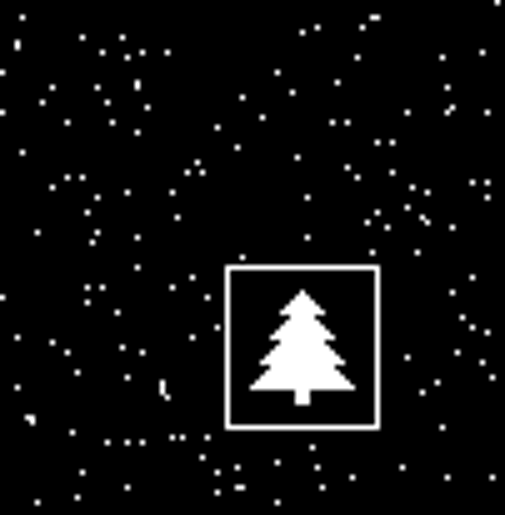

In [49]:
visualize(run(6377))